<a href="https://colab.research.google.com/github/keerthn123/demo1/blob/main/logistic_regression_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
dataset = pd.read_csv('/content/train.csv')
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
dataset.shape

(20800, 5)

In [ ]:
dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#@title Default title text
dataset.dropna(axis=0, inplace= True)

In [ ]:
dataset.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
dataset.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


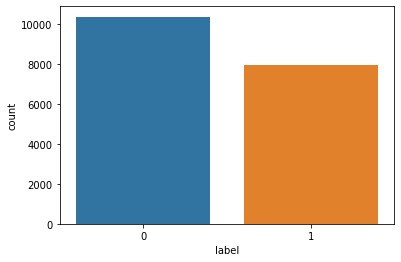

In [ ]:
sns.countplot(dataset['label'])

In [ ]:
data = dataset['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [ ]:
import re

In [ ]:
data = re.sub('[^a-zA-Z]','  ',data)

In [ ]:
data = data.lower()
data

'house  dem  aide    we  didn  t  even  see  comey  s  letter  until  jason  chaffetz  tweeted  it'

In [ ]:
list = data.split()
list

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [ ]:
!pip install nltk
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [ ]:
ps = PorterStemmer()
review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))] 

In [ ]:
review

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [ ]:
' '.join(review)

'hous dem aid even see comey letter jason chaffetz tweet'

In [ ]:
corpus = []
for i in range(0, len(dataset)) :
    review = re.sub('[^a-zA-Z]' ,' ', dataset['title'][i])
    review = review.lower()
    list = review.split()
    review = [ps.stem(word)for word in list if not word in set(stopwords.words('english'))]
    corpus.append(' '.join(review))

In [ ]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 13913)

In [ ]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = dataset['label']

In [ ]:
y.shape

(18285,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [ ]:

X_train.shape

(13713, 13913)

In [ ]:
x_test.shape

(4572, 13913)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifer = MultinomialNB()
classifer.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifer.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

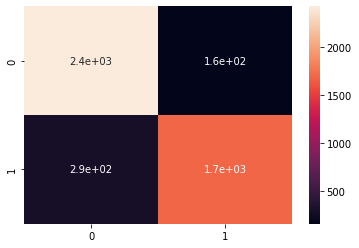

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

array([[2427,  156],
       [ 290, 1699]])

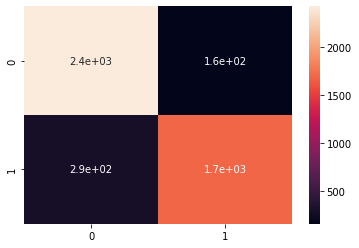

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
cm

In [ ]:
accuracy_score(y_test, y_pred)

0.9024496937882764